In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix


In [ ]:
import matplotlib.pyplot as plt
import random
import time
import cProfile, pstats, io
from pstats import SortKey

In [ ]:
def dist_matrix_creator(data: np.ndarray, n: int, pad: float = 0.5) : 
    x_min = np.min(data[:,0])
    x_max = np.max(data[:,0])
    y_min = np.min(data[:,1])
    y_max = np.max(data[:,1])
    
    x_interval = (x_max - x_min) / n 
    y_interval = (y_max - y_min) / n
    
    x_pad = x_interval * pad
    y_pad = y_interval * pad
    
    lst_x = np.arange(x_min, x_max + x_interval, x_interval)
    lst_y = np.arange(y_min, y_max + y_interval, y_interval)    
    
    idx = np.arange(0,len(data),1)

    DIST = {}
    IDX_padding={}
    IDX_wo_padding={}
    
    

    for i in range(len(lst_x)-1) : 
        x_idx_padding = (lst_x[i] - x_pad <= data[:,0]) & (data[:,0]<= lst_x[i+1] + x_pad)
        x_idx_wo_padding = (lst_x[i] <= data[:,0]) & (data[:,0]<= lst_x[i+1])                
        
        for j in range(len(lst_y)-1) : 
            
            y_idx_padding = (lst_y[j] - y_pad <= data[:,1]) & (data[:,1]<= lst_y[j+1] + y_pad)
            y_idx_wo_padding = (lst_y[j] <= data[:,1]) & (data[:,1]<= lst_y[j+1])



            idx_clip_padding = idx[x_idx_padding & y_idx_padding]
            idx_clip_wo_padding = idx[x_idx_wo_padding & y_idx_wo_padding]


            data_clip = data[x_idx_padding & y_idx_padding]
            dist_matrix_clip = distance_matrix(data_clip, data_clip)    

            DIST[i,j] = dist_matrix_clip        
            IDX_padding[i,j] = idx_clip_padding
            IDX_wo_padding[i,j] = idx_clip_wo_padding
            
            

    
    
    return DIST, IDX_padding, IDX_wo_padding

In [ ]:
def evaluation_dist_matrix_creator(data, N, pad:float = 1) : 
    start = time.time()    
    RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = pad)
    print("elapsted time :", time.time() - start)
    s = 0
    for k in RESULT.keys() : 
        s += RESULT[k].shape[0] * RESULT[k].shape[1]

    i = random.choice(range(N))
    j = random.choice(range(N))


    d_for_scatter = data[IDX_wo_padding[i,j]]
    d_for_scatter_padding = data[IDX_padding[i,j]]
    
    plt.figure(figsize=(10,10))
    plt.scatter(data[:,0], data[:,1], color='grey', s=1)
    plt.scatter(d_for_scatter_padding[:,0], d_for_scatter_padding[:,1],color='black', s=3)
    plt.scatter(d_for_scatter[:,0], d_for_scatter[:,1],color='red', s=10)
        
    print("size of dist_matrix with the original", len(data)**2)
    print("size of dist_matrix with the reduced", s)
    print("improved by the factor of", round(len(data)**2 / s,2))


# TEST WITH RANDOM DATA

In [ ]:
#Data Preparation

data = np.random.rand(20000,2)

data[:,0] = data[:,0] * 2
data[:,1] = data[:,1] * 2

In [ ]:
s=10
pad = 1 
x_min = np.min(data[:,0])
x_max = np.max(data[:,0])
y_min = np.min(data[:,1])
y_max = np.max(data[:,1])

x_interval = (x_max - x_min) / s
y_interval = (y_max - y_min) / s

x_pad = x_interval * pad
y_pad = y_interval * pad

lst_x = np.arange(x_min, x_max + x_interval, x_interval)
lst_y = np.arange(y_min, y_max + y_interval, y_interval)    

idx = np.arange(0,len(data),1)


In [ ]:
i=1;j=1

In [ ]:
x_idx_w_padding = (lst_x[i] - x_pad <= data[:,0]) & (data[:,0]<= lst_x[i+1] + x_pad)
y_idx_w_padding = (lst_y[j] - y_pad <= data[:,1]) & (data[:,1]<= lst_y[j+1] + y_pad)
            

In [ ]:
x_idx_w_padding

In [ ]:
%%timeit
idx_clip_padding = idx[x_idx_w_padding & y_idx_w_padding]

In [ ]:
%%timeit
data_clip = data[idx_clip_padding]

In [ ]:
%%timeit
data_clip = data[x_idx_w_padding & y_idx_w_padding]


In [ ]:
x_idx_wo_padding = (lst_x[i] <= data[:,0]) & (data[:,0]<= lst_x[i+1])                

In [ ]:
%%timeit
x_idx_wo_padding = (lst_x[i] <= data[:,0]) & (data[:,0]<= lst_x[i+1])                
y_idx_wo_padding = (lst_y[j] <= data[:,1]) & (data[:,1]<= lst_y[j+1])
idx_clip_wo_padding = idx[x_idx_wo_padding & y_idx_wo_padding]

In [ ]:
%%timeit
idx_clip_boolean_x = (lst_x[i] <= data_clip[:,0]) & (data_clip[:,0] <=lst_x[i+1])
idx_clip_boolean_y = (lst_y[i] <= data_clip[:,1]) & (data_clip[:,1] <=lst_y[i+1])
idx_clip_boolean = idx_clip_boolean_x & idx_clip_boolean_y


In [ ]:
%%timeit
data_clip = data[x_idx_w_padding & y_idx_w_padding]        

In [ ]:
%%timeit
data_clip = data[idx_clip_padding]

In [ ]:
DIST={}
DIST[0,0] = distance_matrix(data_clip, data_clip)

In [ ]:
key=(0,0)
IDX_argsort = idx_clip_padding[DIST[key].argsort()]

In [ ]:
%%timeit
boolean_idx = np.isin(IDX_argsort[:,0], idx_clip_wo_padding) #filter out to get only values within the box (excluding padding)
ix_ = IDX_argsort[boolean_idx]

In [ ]:
%%timeit
boolean_idx = IDX_argsort[idx_clip_boolean]

In [ ]:
%%timeit
block_dist_mat = DIST[key]
block_idx = idx_clip_padding
block_dist_mat_argsort = block_dist_mat.argsort()
block_idx[block_dist_mat_argsort]

In [ ]:
%%timeit
idx_clip_padding[DIST[key].argsort()]

In [ ]:
block_idx

In [ ]:
len(block_idx)

In [ ]:
block_dist_mat_argsort.shape

In [ ]:
boolean_idx = IDX_argsort[idx_clip_boolean]

In [ ]:
boolean_idx

In [ ]:
len(idx_clip_wo_padding)

In [ ]:
len(idx_clip_boolean)

In [ ]:
len(IDX_argsort)

In [ ]:
print(data.shape)
data

In [ ]:
%%timeit
dist_matrix_creator(data, 10)

In [ ]:
%%timeit
dist_matrix_creator(data, 25)

In [ ]:
%%timeit
dist_matrix_creator(data, 50, pad=0.5)

In [ ]:
%%timeit
dist_matrix_creator(data, 50)

In [ ]:
%%timeit
dist_matrix_creator(data, 75)

In [ ]:
DIST, IDX_w_padding, IDX_wo_padding = dist_matrix_creator(data, 100)

In [ ]:
NEIGHBOR = {}
for key in DIST.key() : 
    

In [ ]:
%%timeit
dist_matrix_creator(data, 100)

In [ ]:
%%timeit
dist_matrix_creator(data, 150)

In [ ]:
%%timeit
dist_matrix_creator(data, 200)

In [ ]:
%%timeit
dist_matrix_creator(data, 300)

In [ ]:
%%timeit
dist_matrix_creator(data, 500)

In [ ]:
%%timeit
distance_matrix(data, data)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=0.5)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=1)

In [ ]:
evaluation_dist_matrix_creator(data, 25, pad=1)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=1)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=1.5)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=3)

In [ ]:
evaluation_dist_matrix_creator(data, 50, pad=2)

In [ ]:
evaluation_dist_matrix_creator(data, 30, pad=2)

# TEST WITH RANDOM DATA

In [ ]:
#Data Preparation

data = np.random.rand(40000,2)
idx = np.arange(0,len(data),1)
data[:,0] = data[:,0] * 2
data[:,1] = data[:,1] * 2

In [ ]:
print(data.shape)
data

In [ ]:
%%timeit
distance_matrix(data,data)

In [ ]:
%%timeit
dist_matrix_creator(data, 10)

In [ ]:
%%timeit
dist_matrix_creator(data, 25)

In [ ]:
%%timeit
dist_matrix_creator(data, 50)

In [ ]:
%%timeit
dist_matrix_creator(data, 100)

In [ ]:
%%timeit
dist_matrix_creator(data, 200)

In [ ]:
%%timeit
distance_matrix(data, data)

In [ ]:
%%timeit
N=50
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)# TEST WITH RANDOM DATA

#Data Preparation

data = np.random.rand(20000,2)
idx = np.arange(0,len(data),1)
data[:,0] = data[:,0] * 2
data[:,1] = data[:,1] * 2

print(data.shape)
data

%%timeit
dist_matrix_creator(data, 10)

%%timeit
dist_matrix_creator(data, 25)

In [ ]:
%%timeit
distance_matrix(data,data)

In [ ]:

pr = cProfile.Profile()
pr.enable()

N=300
#cProfiling from here
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, 50, pad = 1)
#cProfiling till here
pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())



In [ ]:
N=10
evaluation_dist_matrix_creator(data, N, pad=1)

In [ ]:

pr = cProfile.Profile()
pr.enable()

N=300
#cProfiling from here

evaluation_dist_matrix_creator(data, N, pad=1)
#cProfiling till here

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())




In [ ]:
N=100
command = 'RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 0.5)'
cProfile.run(command)
    

In [ ]:
evaluation_dist_matrix_creator(data,50,1)

In [ ]:
%%timeit
N=10
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


In [ ]:
%%timeit
N=200
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


In [ ]:

N=50
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, N, pad = 1)


In [ ]:

IDX_argsort = IDX_padding[0,0][RESULT[0,0].argsort()]
idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[0,0])
IDX_argsort[idx_]

In [ ]:
for key in IDX_padding.keys() : 
    IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
    idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
    IDX_argsort[idx_]



In [ ]:
IDX_wo_padding[5,5]

In [ ]:
str(key)

In [ ]:
def test() : 
    key=(random.choice(range(N)),random.choice(range(N)))
    print(key)
    print(IDX_wo_padding[key])
    
    
#     i = random.choice(range(len(IDX_wo_padding[key])))
    for i in range(len(IDX_wo_padding[key])) : 
    
        
        
        print(i, IDX_wo_padding[key][i])


        IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
        idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
        ix_ = IDX_argsort[idx_]



        plt.figure(figsize=(15,15))
        plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
        plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
        plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
        plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)
        
        plt.savefig(
            str(key) + str(IDX_wo_padding[key][i]) + '.png'
        )




In [ ]:
x=np.linspace(0,5,100)
y=np.sin(x)
plt.figure()
plt.ion()
plt.plot(x,y)
plt.title("Plot generated using Matplotlib")
plt.xlabel("x")
plt.ylabel("sinx")
plt.close()
plt.savefig("Plot generated using Matplotlib.png")

In [ ]:
from pylab import figure, title, show, scatter

figure(figsize=(15,15))
scatter(data[:,0], data[:,1], color='grey', s=0.1)
scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)
title(str(key) + str(IDX_wo_padding[key][i]))
plt.savefig("Plot generated using Matplotlib.png")
plt.close()


In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)

In [ ]:
def test() : 
    for key in IDX_wo_padding.keys() : 
        print(key)
        print(IDX_wo_padding[key])


    #     i = random.choice(range(len(IDX_wo_padding[key])))
        for i in range(len(IDX_wo_padding[key])) : 



            print(i, IDX_wo_padding[key][i])


            IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
            idx_ = np.isin(IDX_argsort[:,0],IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
            ix_ = IDX_argsort[idx_]



            plt.figure(figsize=(15,15))
            plt.scatter(data[:,0], data[:,1], color='grey', s=0.1)
            plt.scatter(data[IDX_padding[key]][:,0], data[IDX_padding[key]][:,1], color='darkgrey', s=5)
            plt.scatter(data[ix_[i]][:10,0], data[ix_[i]][:10,1], color='blue', s=10)
            plt.scatter(data[ix_[i]][0,0], data[ix_[i]][0,1], color='red', s=20)

            plt.savefig(
                str(key) + str(IDX_wo_padding[key][i]) + '.png'
            )            
            plt.close()





In [ ]:
test()

In [ ]:
%%timeit
RESULT, IDX_padding, IDX_wo_padding = dist_matrix_creator(data, 100, pad = 1)# TEST WITH RANDOM DATA

In [ ]:
%%timeit
def neighbor() : 
NEIGHBOR={}
for key in IDX_wo_padding.keys() : 
    IDX_argsort = IDX_padding[key][RESULT[key].argsort()]
    boolean_idx = np.isin(IDX_argsort[:,0], IDX_wo_padding[key]) #filter out to get only values within the box (excluding padding)
    ix_ = IDX_argsort[boolean_idx]
    for i in ix_ : 
        NEIGHBOR[i[0]] = i[1:]

In [1]:
from distance_matrix.scalable_dist_matrix_ import DistanceMatrix

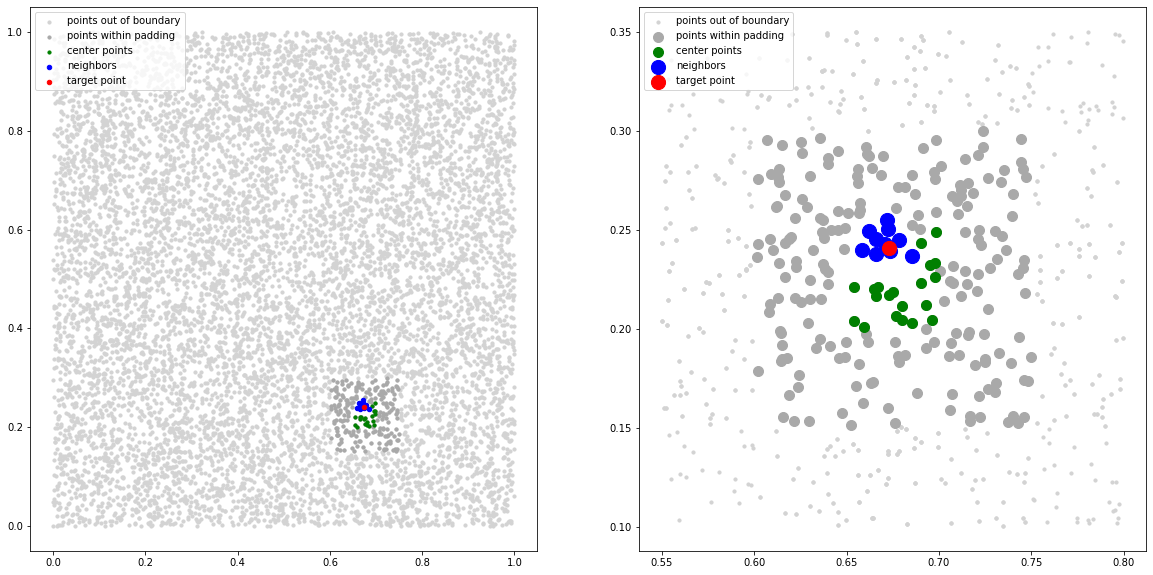

In [2]:
N=10000
s=20
p=1
k=10
distmat1 = DistanceMatrix(N,s,p) 
distmat1.create_dist_matrix()
distmat1.find_neighbor(k=k)
distmat1.pick_and_draw_random_block()


In [ ]:
N=10000
s=20
p=2
k=10
distmat2 = DistanceMatrix(N,s,p) 
distmat2.create_dist_matrix()
distmat2.find_neighbor(k=k)
distmat2.pick_and_draw_random_block()


In [ ]:
N=4000
s=10
p=1
k=3
distmat3 = DistanceMatrix(N,s,p) 
distmat3.create_dist_matrix()
distmat3.find_neighbor(k=k)
distmat3.pick_and_draw_random_block()


In [ ]:

if __name__ == '__main__' : 
    
    
    # lst = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 27000, 28000, 29000, 30000, 40000, 50000]
    # lst = [29000]
    # result = []
    
    
    
    # N = int(sys.argv[1])  
    # s = int(sys.argv[2])  
    # p = float(sys.argv[3])
    # draw = sys.argv[4]

    N = 10000
    s = 20
    p = 1
    draw = False    
    # N = 10000
    # s = 100
    # p = 1
    distmat = DistanceMatrix(N,s,p) 
    print("{} stations \n slicing by {}\n with padding {}".format(N, s, p))
    start = time.time()
    distmat.create_dist_matrix()
    distmat.find_neighbor(k=10)    
    end = time.time() - start    
    
    
    

    matrix_size = 0
    for k in distmat._DIST.keys() : 
        matrix_size += distmat._DIST[k].shape[0] * distmat._DIST[k].shape[1]
    
    print("="*100)    
    print("\t elapsted time {}".format(round(end,3)))
    print("\t size of NEIGHBOR:", len(distmat.NEIGHBOR))
    print("\t size of dist_matrix with the original: {:,}".format(len(distmat._data)**2))
    print("\t size of dist_matrix with the reduced: {:,}".format(matrix_size))
    print("\t improved by the factor of", round(len(distmat._data)**2 / matrix_size,2))
    print("="*100)    
    # print(DIST)
    
    distmat.pick_and_draw_random_block()
    


    
    #     print(metadata._data.shape)
    #     DIST = distance_matrix(metadata._data, metadata._data)
    #     print(DIST.shape)
    #     end = time.time() - start
    #     print("\n", i, end)
    #     result.append((i, end))
    
    # dist_matrix_creator

